In [74]:
!pip install scikit-learn

In [75]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
#Read the dataset
df=pd.read_csv('1000_Companies (1).csv')

In [77]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [78]:
#Find any missing data are in the dataset
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


<AxesSubplot:>

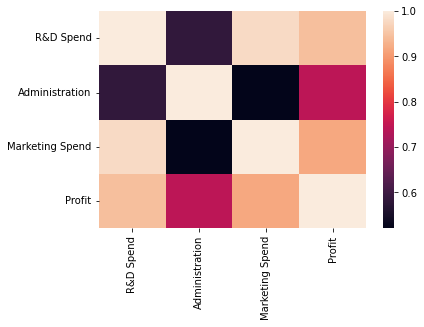

In [79]:
#Data visualization
#get heatmap to find how the features are co-related
df.corr()
sns.heatmap(df.corr())

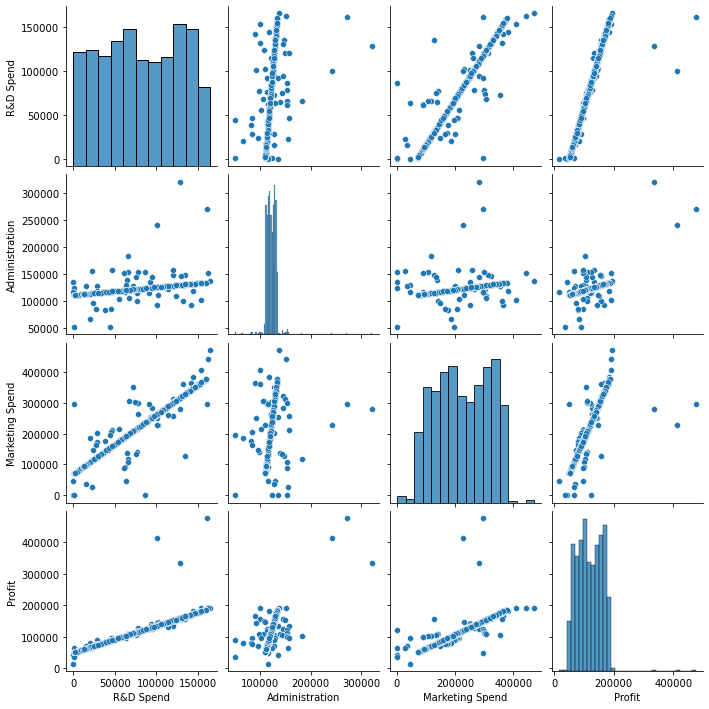

In [80]:
sns.pairplot(df)

In [81]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,4].values

In [82]:
#Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)



In [83]:
X = X[:,1:]

In [84]:
#spilitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [85]:
#Fittting multiple linear regression to the training dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred=regressor.predict(X_test)
print(y_pred)

[ 81764.92907438  80280.55923467  87321.27355312 179016.70579314
  81164.93633219 110731.82615905 177742.21159418  83596.80389165
 169544.25700316  45707.408202    56900.56756987 151676.83772512
 122179.20833131  48613.69259145 177261.56456425  72352.13305635
 116494.7517225  163175.46522686 157789.97442189 188564.55478697
  86526.61570473  77279.12439901 184799.11544623  75619.13371955
  98328.40334732  94221.86484932  26712.07670595  52283.71521112
  59019.2275463  229689.32148644 119249.57012553 105642.82455558
 100842.87809011 137952.25571743  53656.25271285 102521.81799808
 192859.79210549 174402.92199348 177888.24841768 115867.00057617
  95664.86570593 164131.10417528 101287.80129294  42410.78078789
 114606.82766305  47845.81848817 160222.47318368  73269.60478033
 161649.85957413 130526.67023188 189031.76457431 177849.94818746
  86070.44216737  75645.02383591 183053.35684271  79714.32923231
 143332.04527361 176099.21156746  82202.78081293 105000.79500552
 141981.25938362  47543.8

In [87]:
#calculating the coefficiens
print(regressor.coef_)

[ 6.90895143e+04  0.00000000e+00  5.29521199e+03  5.29090809e+03
 -9.19761355e+04  5.26181706e+03  0.00000000e+00  1.07687126e+04
  1.07678358e+04  5.18458644e+03  7.96258223e+03  7.96162583e+03
  5.17829001e+03  1.07368320e+04  5.14585157e+03  0.00000000e+00
  1.06829539e+04  5.10719639e+03  5.09420505e+03  7.86925192e+03
  1.06445378e+04  1.06299525e+04  0.00000000e+00  1.06065999e+04
  5.00533798e+03  5.00087474e+03  4.98501418e+03  0.00000000e+00
  1.05210007e+04  7.70283538e+03  7.69733601e+03  7.68928612e+03
  4.90579097e+03  4.90061036e+03  4.84163140e+03  7.61779402e+03
  4.83613194e+03  7.60663577e+03  7.59691221e+03  4.81413440e+03
  4.77715298e+03  4.77547923e+03  4.76336459e+03  4.75770578e+03
  1.02887508e+04  0.00000000e+00  1.02293733e+04  1.02281777e+04
  4.66844024e+03  1.02222002e+04  0.00000000e+00  1.02092088e+04
  1.02021154e+04  1.01950219e+04  4.62468419e+03  7.38530502e+03
  7.37805220e+03  0.00000000e+00  0.00000000e+00  1.00983442e+04
  1.00942794e+04  0.00000

In [88]:
#calculating the Intercept
print(regressor.intercept_)

-81668.652877546


In [90]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8629317146108413